## Imports

In [38]:
%load_ext autoreload
%autoreload 2

from utils.prepare_data import prepare_short_data, prepare_full_data
from environment import Environment
from models.base_model import Base_model
from models.DQN import DQN

from datetime import timedelta
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constants

In [2]:
df = prepare_full_data('data/Data_RU.xlsx')
# env = Environment(data=df, stock_name='AFKS', initial_money=1000)

In [361]:
env.data.head()

,Date,Weekday,AFKS_close,AFKS_high,AFKS_low,AFKS_open,AFKS_volume,AFKS_D1,AFKS_D2,AFKS_D3,AFKS_D4
1002,2021-12-17,4,23.255,23.751,22.781,23.501,44723500.0,0.044535,-0.010468,0.010638,0.031605
1003,2021-12-20,0,22.499,23.198,22.400,23.198,37123100.0,0.024601,-0.030132,0.000000,0.035625
1004,2021-12-21,1,22.641,23.077,22.382,22.697,31016200.0,0.007860,-0.002467,0.016742,0.014074
1005,2021-12-22,2,22.520,22.946,22.308,22.700,37632400.0,0.016115,-0.007930,0.010837,0.017572
1006,2021-12-23,3,22.340,22.838,22.072,22.610,34848700.0,0.012766,-0.011942,0.010084,0.024375


In [362]:
env.data.isna().sum()

Date           0
Weekday        0
AFKS_close     0
AFKS_high      0
AFKS_low       0
AFKS_open      0
AFKS_volume    0
AFKS_D1        0
AFKS_D2        0
AFKS_D3        0
AFKS_D4        0
dtype: int64

In [363]:
start_date = env.first_date()

In [364]:
model = Base_model()
# here we have to train the model

In [365]:
env.reset()
for i in range(10, env.day_count-1):
    obs = env.observation(i)
    action = model.predict(obs)
    
    reward = env.reward(i, action)
    state = env.observation(i)
    model.fit(state, action, reward)
    
    env.transition(i, action)

called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_mo

called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing
called base_model.fit(state, action, reward), did nothing


In [366]:
env.stocks

[0,
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([2]),
 array([1]),
 array([0]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([2]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([-1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([-1]),
 array([0]),
 array([-1]),
 array([-2]),
 array([-1]),
 array([-2]),
 array([-3]),
 array([-4]),
 array([-3]),
 array([-2]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([0]),
 array([-1]),
 array([0]),
 array([-1]),
 array([0]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([0]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([0]),
 array([-1]),
 array([-1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([-1]),
 array([-1

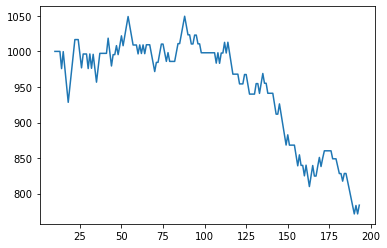

In [367]:
plt.plot(range(10, env.day_count), env.money)

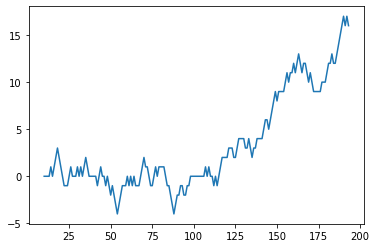

In [368]:
plt.plot(range(10, env.day_count), env.stocks)

## DQN

In [3]:
# 15 is random nummber in [10, days_count] here
dqn = DQN(env.observation_tensor(15).shape[0], 3, env, batch_size=32)
dqn.fit()

NameError: name 'env' is not defined

In [ ]:
env.reset()
for i in range(10, env.day_count-1):
    obs = env.observation_tensor(i)
    action = dqn.predict(obs)
    
    reward = env.reward(i, action)
    state = env.observation_tensor(i)
#     model.fit(state, action, reward)
    
    env.transition(i, action)

In [4]:
plt.plot(range(10, env.day_count), env.money)

NameError: name 'env' is not defined

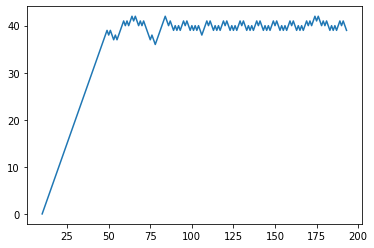

In [391]:
plt.plot(range(10, env.day_count), env.stocks)

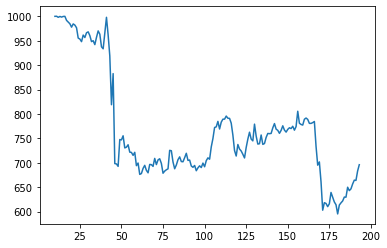

In [392]:
plt.plot(range(10, env.day_count), env.total_cost())

### Add more stocks to train on

In [ ]:
env = Environment(data=df, stock_name='AFKS', initial_money=1000)
dqn = DQN(env.observation_tensor(15).shape[0],
          3,
          env,
          batch_size=128)
for s in ['AFKS', 
          'SBER',
          'YNDX',
#           'GAZP'
         ]:
    state = dqn.state_dict()
    env = Environment(data=df, stock_name=s, initial_money=1000)
    dqn.fit(state)

 34%|███▍      | 3378/10000 [00:18<00:39, 169.19it/s]

## Testing

In [ ]:
# test_env = Environment(data=df, stock_name='MTSS', initial_money=1000)
test_env = Environment(data=df, stock_name='SBERP', initial_money=1000)